In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# load the data
data_path='hour.csv'
rides=pd.read_csv(data_path)

In [4]:
# show the head of data
print rides.head()

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [5]:
# show the describe
print rides.describe()

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

     instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1   0        0        6           0   
1          2  2011-01-01       1   0     1   1        0        6           0   
2          3  2011-01-01       1   0     1   2        0        6           0   
3          4  2011-01-01       1   0     1   3        0        6           0   
4          5  2011-01-01       1   0     1   4        0        6           0   
5          6  2011-01-01       1   0     1   5        0        6           0   
6          7  2011-01-01       1   0     1   6        0        6           0   
7          8  2011-01-01       1   0     1   7        0        6           0   
8          9  2011-01-01       1   0     1   8        0        6           0   
9         10  2011-01-01       1   0     1   9        0        6           0   
10        11  2011-01-01       1   0     1  10        0        6           0   
11        12  2011-01-01       1   0    

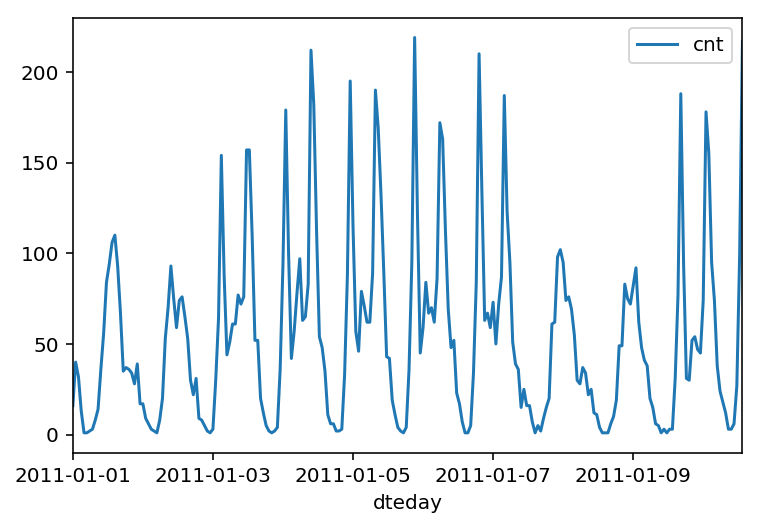

In [6]:
# plot the count of total rental bikes including both casual and registered with time
print rides[:240]
print rides[:240].plot(x='dteday', y='cnt')

In [7]:
# convert the categorical variables to onehot encoding
dummy=['season', 'weathersit', 'mnth', 'hr', 'weekday']
for variable in dummy:
    variables=pd.get_dummies(rides[variable], prefix=variable, drop_first=False)
    rides=pd.concat([rides, variables], axis=1)
    
data=rides.drop(['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr'], axis=1)


In [11]:
# dispaly preprocessed data
print data.head()

   yr  holiday  temp   hum  windspeed  casual  registered  cnt  season_1  \
0   0        0  0.24  0.81        0.0       3          13   16         1   
1   0        0  0.22  0.80        0.0       8          32   40         1   
2   0        0  0.22  0.80        0.0       5          27   32         1   
3   0        0  0.24  0.75        0.0       3          10   13         1   
4   0        0  0.24  0.75        0.0       0           1    1         1   

   season_2    ...      hr_21  hr_22  hr_23  weekday_0  weekday_1  weekday_2  \
0         0    ...          0      0      0          0          0          0   
1         0    ...          0      0      0          0          0          0   
2         0    ...          0      0      0          0          0          0   
3         0    ...          0      0      0          0          0          0   
4         0    ...          0      0      0          0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  
0          0  

In [8]:
# features need to be normalized
feature_norm=['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# normalization
feature_normed={}
for i in feature_norm:
    print i
    mean, std=data[i].mean(), data[i].std()
    feature_normed[i]=[mean, std]
    data.loc[:, i]=(data[i]-mean)/std
print feature_normed
print data

casual
registered
cnt
temp
hum
windspeed
{'cnt': [189.46308763450142, 181.38759909186473], 'temp': [0.4969871684216583, 0.19255612124972191], 'hum': [0.6272288394038783, 0.19292983406291508], 'registered': [153.78686920996606, 151.35728591258314], 'windspeed': [0.1900976063064618, 0.12234022857279049], 'casual': [35.676218424535357, 49.30503038705308]}
       yr  holiday      temp       hum  windspeed    casual  registered  \
0       0        0 -1.334609  0.947345  -1.553844 -0.662736   -0.930162   
1       0        0 -1.438475  0.895513  -1.553844 -0.561326   -0.804632   
2       0        0 -1.438475  0.895513  -1.553844 -0.622172   -0.837666   
3       0        0 -1.334609  0.636351  -1.553844 -0.662736   -0.949983   
4       0        0 -1.334609  0.636351  -1.553844 -0.723582   -1.009445   
5       0        0 -1.334609  0.636351  -0.821460 -0.723582   -1.009445   
6       0        0 -1.438475  0.895513  -1.553844 -0.683018   -1.016052   
7       0        0 -1.542341  1.206507  -1.55

In [9]:
# data split (training, validation, test)
test_data=data[-21*24:]     # the last 21 days
data=data[:-21*24]
print test_data
print data

       yr  holiday      temp       hum  windspeed    casual  registered  \
16875   1        0  0.015647  0.999178   0.276298 -0.500481   -0.256260   
16876   1        0 -0.192085  1.310171   0.519881 -0.561326   -0.513929   
16877   1        0 -0.192085  0.740016   2.228232 -0.683018   -0.824452   
16878   1        0 -0.399817  0.429022   2.106440 -0.703300   -0.969804   
16879   1        0 -0.503683  0.169861   1.130474 -0.723582   -1.009445   
16880   1        0 -0.711414  0.688184   0.764282 -0.723582   -0.996231   
16881   1        0 -0.815280  0.688184   0.764282 -0.723582   -0.963197   
16882   1        0 -0.815280  0.429022   1.130474 -0.703300   -0.751777   
16883   1        0 -0.815280  0.429022   0.886073 -0.723582   -0.236440   
16884   1        0 -0.815280  0.169861   1.862040 -0.561326    1.441709   
16885   1        0 -0.815280 -0.089301   0.886073 -0.399071    3.661622   
16886   1        0 -0.815280 -0.089301   1.618457 -0.480199    1.111365   
16887   1        0 -0.711

In [10]:
# separate features and labels
features=data.drop(['cnt', 'casual', 'registered'], axis=1)
labels=data[['cnt', 'casual', 'registered']]
test_features=test_data.drop(['cnt', 'casual', 'registered'], axis=1)
test_labels=test_data[['cnt', 'casual', 'registered']]

In [11]:
# split the data to training and validation
val_features, val_labels=features[-60*24:], labels[-60*24:]  # the last 60 days
train_features, train_labels=features[:-60*24], labels[:-60*24]


In [19]:
'''The network has two layers, a hidden layer and an output layer. 
The hidden layer will use the sigmoid function for activations. 
The output layer has only one node and is used for the regression, 
the output of the node is the same as the input of the node. That is, 
the activation function is $f(x)=x$. A function that takes the input signal and generates 
an output signal, but takes into account the threshold, is called an activation function. 
We work through each layer of our network calculating the outputs for each neuron.
All of the outputs from one layer become inputs to the neurons on the next layer. 
This process is called forward propagation.'''


'The network has two layers, a hidden layer and an output layer. \nThe hidden layer will use the sigmoid function for activations. \nThe output layer has only one node and is used for the regression, \nthe output of the node is the same as the input of the node. That is, \nthe activation function is $f(x)=x$. A function that takes the input signal and generates \nan output signal, but takes into account the threshold, is called an activation function. \nWe work through each layer of our network calculating the outputs for each neuron.\nAll of the outputs from one layer become inputs to the neurons on the next layer. \nThis process is called forward propagation.'

In [16]:
# build neural network
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes=input_nodes
        self.hidden_nodes=hidden_nodes
        self.output_nodes=output_nodes
        
        # initialize weights
        # numpy.random.normal(loc=0.0, scale=1.0, size=None)
        '''loc : float or array_like of floats---Mean (“centre”) of the distribution.
           scale : float or array_like of floats---Standard deviation (spread or “width”) of the distribution.
           size : int or tuple of ints, optional---Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.'''
        self.weights_input_to_hidden=np.random.normal(0.0, self.hidden_nodes**-0.5, (self.hidden_nodes, self.input_nodes))
        self.weights_hidden_to_output=np.random.normal(0.0, self.output_nodes**-0.5, (self.output_nodes, self.hidden_nodes))
        self.lr=learning_rate
    
        # set the activation function
        '''>>> g = lambda x: x**2
           >>> print g(8)
               64'''
        self.activation_function=lambda x: 1/(1+np.exp(-x))
        
    def train(self, inputs_list, labels_list):
        # convert list to array
        inputs=np.array(inputs_list, ndmin=2).T      # transpose
        labels=np.array(labels_list, ndmin=2).T
        
        # Forward
        hidden_inputs=np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs=final_inputs
        
        # backward propagation
        output_errors=labels-final_outputs
        hidden_errors=np.dot(self.weights_hidden_to_output.T, output_errors)
        hidden_grad=hidden_outputs*(1-hidden_outputs)
        
        self.weights_hidden_to_output+=self.lr*output_errors*hidden_outputs.T
        self.weights_input_to_hidden+=self.lr*np.dot((hidden_errors*hidden_grad), inputs.T)
        
        
    def run(self, inputs_list):
        # run a forward pass through the network
        inputs=np.array(inputs_list, ndmin=2).T
        
        hidden_inputs=np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs=final_inputs
        
        return final_outputs

In [13]:
# mean square error
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [25]:
'''Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, 
you grab a random sample of the data instead of using the whole data set. You use many more training 
passes than with normal gradient descent, but each pass is much faster. 
This ends up training the network more efficiently. '''
print train_labels.shape

(15435, 3)


In [26]:
print train_labels.shape[1]

3


In [27]:
print train_features.shape

(15435, 56)


In [17]:
import sys
epochs=5000
learning_rate=0.01
hidden_nodes=36
output_nodes=1

input_nodes=train_features.shape[1]
ann=NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
'''list1 = [10, 20, 30, 40]
   list2 = [11, 21, 31]
   result = zip(list1, list2)
   for element1, element2 in result:
      print(element1, element2)
output: 10 11
        20 21
        30 31'''
losses={'train':[], 'validation':[]}

for e in range (epochs):
    #batch size 128
    batch=np.random.choice(train_features.index, size=128)
    for feature, label in zip(train_features.ix[batch].values, train_labels.ix[batch]['cnt']):
        ann.train(feature, label)
    
    # print the result
    train_loss=MSE(ann.run(train_features), train_labels['cnt'].values)
    val_loss=MSE(ann.run(val_features), val_labels['cnt'].values)
    sys.stdout.write('\rProgress: '+str(100*e/float(epochs))[:4]\
                    +"%... Training loss: "+str(train_loss)[:5]\
                    +"... Validation loss: "+str(val_loss)[:5])
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)  

Progress: 99.9%... Training loss: 0.057... Validation loss: 0.163

(-0.011087170581531809, 0.5)

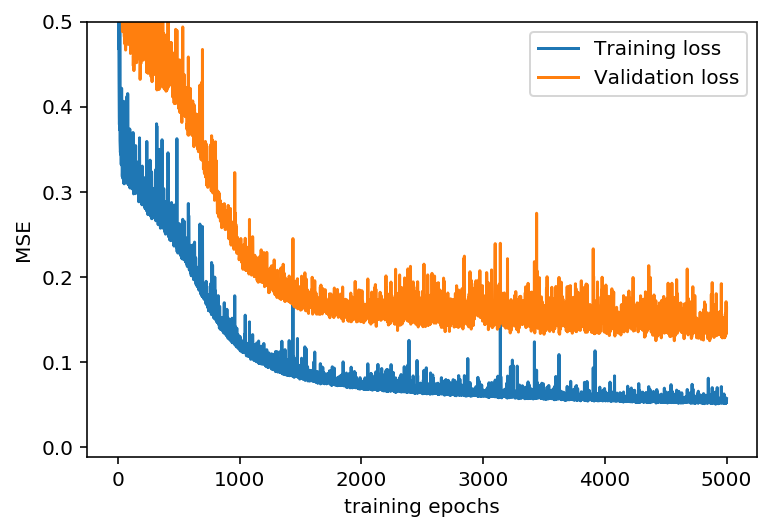

In [18]:
# visualization
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.xlabel('training epochs')
plt.ylabel('MSE')
plt.ylim(ymax=0.5)

189.463087635 181.387599092


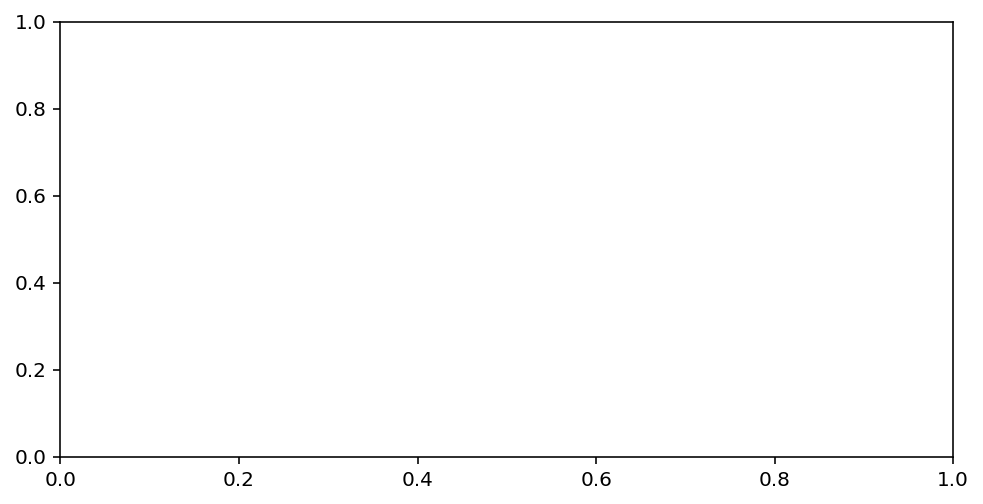

In [19]:
# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later 
fig, ax=plt.subplots(figsize=(8, 4))
mean, std=feature_normed['cnt']
print mean, std

In [20]:
predictions=ann.run(test_features)*std+mean   #restore

In [21]:
print predictions

[[  2.05611569e+02   1.45469216e+02   1.89834357e+01   4.39036708e+01
    4.46468772e+01   9.03093114e+00   4.27673924e+01   3.43106163e+01
    1.65531248e+02   4.31380760e+02   6.47795738e+02   3.50727635e+02
    2.03920781e+02   2.31273849e+02   2.57270324e+02   2.82378384e+02
    2.61752208e+02   2.76256300e+02   3.81526297e+02   6.38846332e+02
    6.11213590e+02   4.32337606e+02   3.22366995e+02   2.56748383e+02
    1.90822500e+02   1.35002716e+02   7.17207826e+01   5.04670623e+01
    3.62291791e+01   3.86979036e+01   3.21773514e+01   6.55798387e+01
    1.74175336e+02   4.32400590e+02   6.51793087e+02   3.64013788e+02
    2.02907163e+02   2.26036913e+02   2.66861317e+02   2.63129068e+02
    2.40691206e+02   2.62426403e+02   3.65602796e+02   6.21763677e+02
    6.00640924e+02   4.07837188e+02   3.17295623e+02   2.53359539e+02
    1.98720945e+02   1.49422543e+02   9.71546568e+01   7.12136280e+01
    6.19703955e+01   6.27186235e+01   5.18528223e+01   8.17504004e+01
    1.71154024e+02  

In [22]:
print predictions[0]

[  2.05611569e+02   1.45469216e+02   1.89834357e+01   4.39036708e+01
   4.46468772e+01   9.03093114e+00   4.27673924e+01   3.43106163e+01
   1.65531248e+02   4.31380760e+02   6.47795738e+02   3.50727635e+02
   2.03920781e+02   2.31273849e+02   2.57270324e+02   2.82378384e+02
   2.61752208e+02   2.76256300e+02   3.81526297e+02   6.38846332e+02
   6.11213590e+02   4.32337606e+02   3.22366995e+02   2.56748383e+02
   1.90822500e+02   1.35002716e+02   7.17207826e+01   5.04670623e+01
   3.62291791e+01   3.86979036e+01   3.21773514e+01   6.55798387e+01
   1.74175336e+02   4.32400590e+02   6.51793087e+02   3.64013788e+02
   2.02907163e+02   2.26036913e+02   2.66861317e+02   2.63129068e+02
   2.40691206e+02   2.62426403e+02   3.65602796e+02   6.21763677e+02
   6.00640924e+02   4.07837188e+02   3.17295623e+02   2.53359539e+02
   1.98720945e+02   1.49422543e+02   9.71546568e+01   7.12136280e+01
   6.19703955e+01   6.27186235e+01   5.18528223e+01   8.17504004e+01
   1.71154024e+02   4.29740452e+02

In [24]:
ax.plot(predictions[0], label='Prediction')
ax.plot((test_labels['cnt']*std+mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

In [28]:
dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])  #fetch the date
dates=dates.apply(lambda d: d.strftime('%b %d'))

In [29]:
ax.set_xticks(np.arange(len(dates))[12::24])   # date start at 12, interval of 24

In [31]:
_=ax.set_xticklabels(dates[12::24], rotation=45)

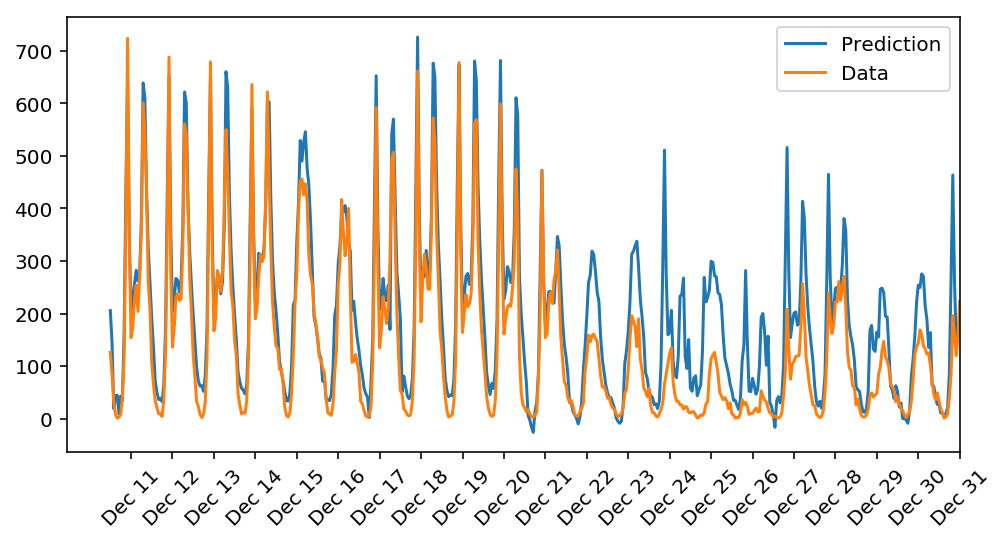

In [32]:
fig, ax=plt.subplots(figsize=(8, 4))
mean, std=feature_normed['cnt']
predictions=ann.run(test_features)*std+mean   #restore
ax.plot(predictions[0], label='Prediction')
ax.plot((test_labels['cnt']*std+mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()
dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])  #fetch the date
dates=dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])   # date start at 12, interval of 24
_=ax.set_xticklabels(dates[12::24], rotation=45)

In [38]:
import unittest

inputs = [0.5, -0.2, 0.1]
targets = [0.4]
test_w_i_h = np.array([[0.1, 0.4, -0.3], 
                       [-0.2, 0.5, 0.2]])
test_w_h_o = np.array([[0.3, -0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        # numpy.all(a, axis=None, out=None) --- Test whether all array elements along a given axis evaluate to True
        # Axis or axes along which a logical AND reduction is performed. The default (axis = None) is to perform a logical AND over all the dimensions of the input array. 
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        # numpy.allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
        # Returns True if two arrays are element-wise equal within a tolerance.
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328, -0.03172939]])))
        print(network.weights_input_to_hidden)
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014,  0.39775194, -0.29887597],
                                              [-0.20185996,  0.50074398,  0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

ValueError: no such test method in <class '__main__.TestMethods'>: runTest